In [1]:
import pandas as pd #For reading data from files into table
import numpy as np #For computing maths on data columns
from matplotlib import pyplot as plt #For plotting basic graphs. Also provides indepth framework for seaborn
import seaborn as sns #For plotting visually asthetic graphs. Works in tandem with matplotlib's pyplot

In [2]:
sns.set_style("darkgrid")
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

# Wrangle

## Gather 

For this project we would be considering the Kaggle dataset on beers and breweries they originate from.  
<TBD>

In [3]:
#Loading beers.csv
df_beer = pd.read_csv('beers.csv')

#Loading breweries.csv
df_breweries = pd.read_csv('breweries.csv')

## Assess 

In [4]:
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [5]:
df_breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [6]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [7]:
df_breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [8]:
#Keeping only columns that are required for df_beers
variables_beer = ['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces']
df_beer = df_beer[variables_beer]

#Keeping only columns that are required for df_breweries
variables_breweries = ['name', 'city', 'state']
df_breweries = df_breweries[variables_breweries]

In [9]:
df_beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


### Data Quality:

- ibu is present for 1405 rows
- abv is missing for 62 rows
- serving size should be an ordered categorical variable

### Data Tidiness

N/A

## Cleaning 

Creating copies of both the dataframes first

In [10]:
df_beer_copy = df_beer.copy()
df_breweries_copy = df_breweries.copy()

### Missing Values of IBU and ABV

##### Define  
Remove all rows without ibu or abv

##### Code

In [11]:
# Removing all rows without ibu and 
df_beer_copy = df_beer_copy[~((df_beer_copy['ibu'].isna()) | (df_beer_copy['abv'].isna()))]

In [12]:
df_beer_copy.reset_index(inplace=True, drop=True)

##### Check

In [13]:
df_beer_copy[df_beer_copy['ibu'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces


In [14]:
df_beer_copy[df_beer_copy['abv'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces


### Merging Beers with Breweries

In [15]:
df_copy = df_beer_copy.merge(df_breweries_copy, how='left', left_on='brewery_id', right_on=df_breweries_copy.index)

In [16]:
cols = ['ABV', 'IBU', 'Beer ID', 'Beer Name', 'Beer Style', 'Brewery ID', 'Serving Size (in Oz.)', 'Brewery Name', 'Brewery City', 'Brewery State']
df_copy.columns = cols

In [17]:
df_copy.to_csv('Merged_Final.csv', index=False)

### What is the Structure of your dataset?

The dataset is currently only one table consisting of the details about the specific beer's chemical composition (IBU and ABV) as well it's origination (State, Brewery Name, Beer Style) along with the serving size.

### What are the main feature(s) of interest in your dataset?

The main feature of interest is definitely the IBU and ABV for the craft beers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The location, type of beer style and serving size would help me in investigating the IBU and ABV of the craft beers

# Analyze 

In [18]:
df_copy['Serving Size (in Oz.)'].unique()

array([12. ,  8.4, 16. , 24. , 19.2, 32. , 16.9])

In [19]:
color = sns.color_palette()[0]
serving_order = [8.4, 12., 16., 16.9,19.2, 24., 32.]

## Univariate Analysis 

### Style of Beer

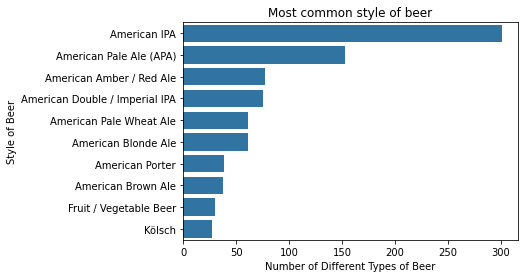

In [20]:
#Considering the top 10 beer styles by count
top_10_beer = df_copy['Beer Style'].value_counts()[0:10].index
df_beer_sub = df_copy[df_copy['Beer Style'].isin(top_10_beer)]

#Plotting the top 10 beer styles in a histogram
color = sns.color_palette()[0]
sns.countplot(data= df_beer_sub, y='Beer Style', order = top_10_beer, color=color)
plt.ylabel('Style of Beer')
plt.xlabel('Number of Different Types of Beer')
plt.title("Most common style of beer");

Seems like American IPA is the most favored beer style in the United States. On a distant second, Americans prefer the American Pale Ale followed by American Amber / Red Ale.

**I would be interested in knowing the distribution of the IBU, ABV and the Serving size of these beer styles across the different states.**

### Breweries

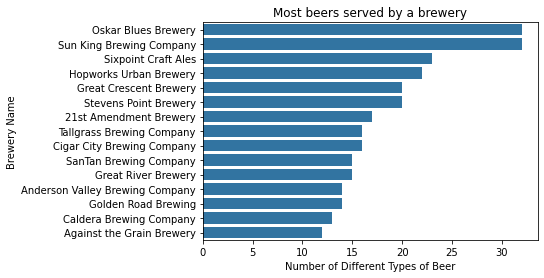

In [21]:
#Considering the top 20 Breweries by count
top_20_breweries = df_copy['Brewery Name'].value_counts()[0:15].index
df_brewery_sub = df_copy[df_copy['Brewery Name'].isin(top_20_breweries)]

#Plotting the top 10 Breweries in a histogram
color = sns.color_palette()[0]
sns.countplot(data= df_brewery_sub, y='Brewery Name', order = top_20_breweries, color=color)
plt.ylabel('Brewery Name')
plt.xlabel('Number of Different Types of Beer')
plt.title("Most beers served by a brewery");

### Top States for Breweries

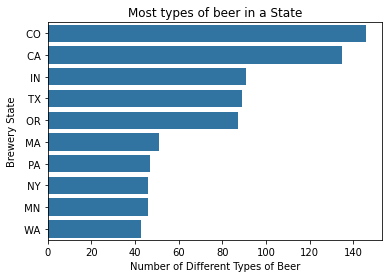

In [22]:
#Considering the top 10 States of Breweries by count
top_10_state = df_copy['Brewery State'].value_counts()[0:10].index #Soring the index as an ordered series for ranking
df_state_sub = df_copy[df_copy['Brewery State'].isin(top_10_state)] #Keeping only the rows with the Brewery State in the top 10 states

#Plotting the top 10 States of Breweries in a histogram
color = sns.color_palette()[0]
#Generate a countplot ordered on the basis of the top_10_state series
sns.countplot(data= df_state_sub, y='Brewery State', order = top_10_state, color=color)
plt.ylabel('Brewery State')
plt.xlabel('Number of Different Types of Beer')
plt.title("Most types of beer in a State");

Looks like Colorado and California are the leading states in terms of most types of craft beers.

**I would like to know the top beers in each of these states.**

### Serving Sizes

Text(0.5, 1.0, 'Serving size distribution')

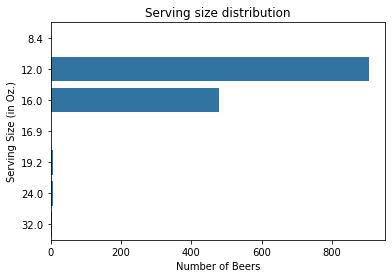

In [23]:
#Plotting a bar graph for seeing the total number of beers served for a particular size
sns.countplot(data = df_copy, y='Serving Size (in Oz.)', color=color)
plt.xlabel("Number of Beers")
plt.title("Serving size distribution")

### ABV Distribution 

Text(0.5, 0, 'Number of Beers')

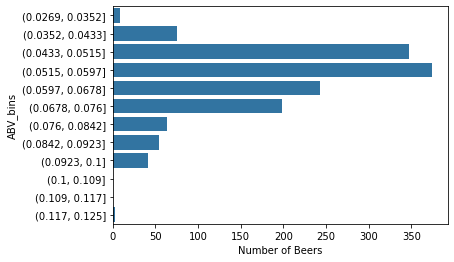

In [24]:
# Creating bins for checking the ABV distribution of the beers
df_copy['ABV_bins'] = pd.cut(df_copy['ABV'], 12)
sns.countplot(data=df_copy, y='ABV_bins', color=color)
plt.xlabel('Number of Beers')

For the ABV, we see it is a right-skewed graph. I would be interested in knowing how does the ABV distribution looks like to that of the IBU (scatter plot).

### IBU Distribution

Text(0.5, 0, 'Number of Beers')

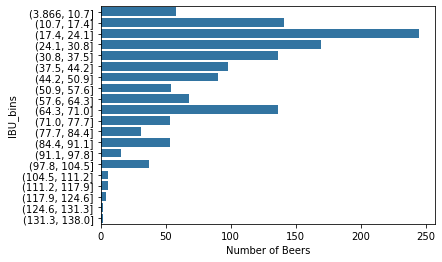

In [25]:
# Creating bins for checking the IBU distribution of the beers
df_copy['IBU_bins'] = pd.cut(df_copy['IBU'], 20)
sns.countplot(data=df_copy, y='IBU_bins', color=color)
plt.xlabel('Number of Beers')

For the IBU, we see that the distribution is bi-modal and not just a normal distribution.

Again, it would be intersting to compare this with the ABV.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables of interest (IBU and ABV) both have a normal distribution with the IBU having a bimodal distibution.No transformation was required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To tidy the data, I removed all rows that did not have IBU or ABV. Since they are the features of interest, it did not make sense to keep the rows without these values.

## Bivariate Analysis 

### Relationship between ABV and IBU

#### On a Linear Scale

Text(0.5, 1.0, 'IBU vs. ABV')

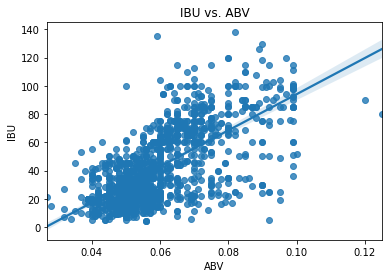

In [26]:
#Trying to see a relationship between the ABV and the IBU
sns.regplot(data=df_copy, x='ABV', y='IBU')
plt.title('IBU vs. ABV')

We see that IBU and ABV seem to be highly co-related. We also see that 0.1 seems to be where most of the beers seem to top of with their alcohol content. So in other words, most beers are within 10% alcohol by volume with a few outliers that max out at 12.5% ABV.

#### On a log scale

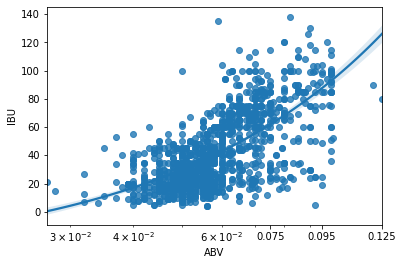

In [27]:
ticks = [0.075, 0.095, 0.125]
g = sns.regplot(data=df_copy, x='ABV', y='IBU')
g.set(xscale='log')
g.set_xticks(ticks=ticks)
g.set_xticklabels(labels=ticks);

Don't see a lot of difference or any new inference compared to the normal graph. This again only helps us in understanding that the IBU is highly correlated to the ABV or vicce versa. Meaning, with the increase in IBU, ABV increases or vice versa.

### Spread of IBU for top 10 beers 

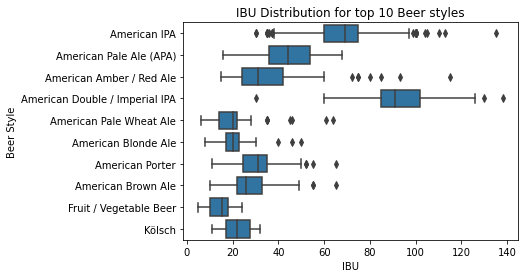

In [28]:
# Plotting a boxplot to see the distribution of the IBU for the top 10 beer styles
sns.boxplot(data=df_beer_sub, y='Beer Style', x='IBU', order=top_10_beer, color=color)
plt.title("IBU Distribution for top 10 Beer styles");

Looks like the American IPA is the second most bitter beer after American Double / Imperial IPA. Would be interesting to see the ABV vs. IBU for each of the beers

### Spread of ABV for top 10 beers

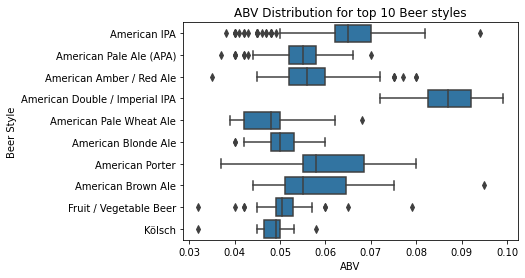

In [29]:
# Plotting a boxplot to see the distribution of the IBU for the top 10 beer styles
sns.boxplot(data=df_beer_sub, y='Beer Style', x='ABV', order=top_10_beer, color=color)
plt.title("ABV Distribution for top 10 Beer styles");

### Serving size for top 10 beers

Text(0.5, 1.0, 'Serving Size for Top 10 Beer Styles')

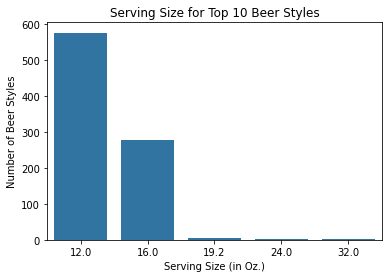

In [30]:
sns.countplot(data=df_beer_sub, x='Serving Size (in Oz.)', color=color)
plt.ylabel('Number of Beer Styles')
plt.title("Serving Size for Top 10 Beer Styles")

### IBU vs Serving Size

<AxesSubplot:xlabel='Serving Size (in Oz.)', ylabel='IBU'>

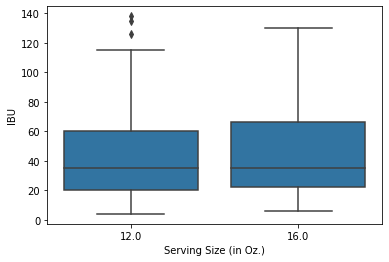

In [31]:
df_serv = df_copy[df_copy['Serving Size (in Oz.)'].isin([12.0,16.0])]
sns.boxplot(data=df_serv, x='Serving Size (in Oz.)', y='IBU', color=color)

### ABV vs Serving Size

<AxesSubplot:xlabel='Serving Size (in Oz.)', ylabel='ABV'>

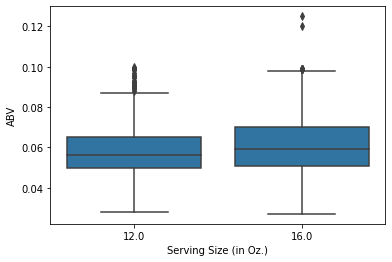

In [32]:
df_serv = df_copy[df_copy['Serving Size (in Oz.)'].isin([12.0,16.0])]
sns.boxplot(data=df_serv, x='Serving Size (in Oz.)', y='ABV', color=color)

Seems like the beer with the highest ABV of around 0.12 is only served in a 16 Ounces serving.

### Serving Size in Top 10 States

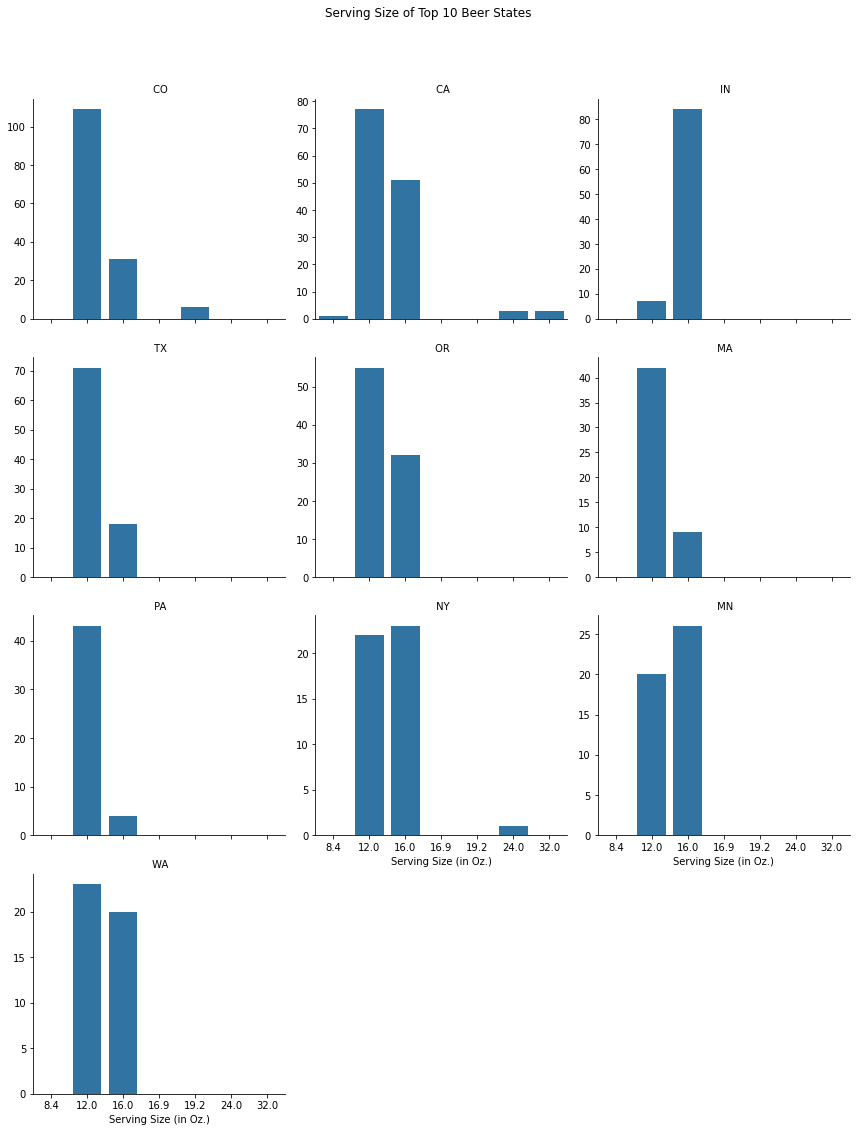

In [33]:
g = sns.FacetGrid(data=df_state_sub, col='Brewery State', col_wrap=3,height=4, col_order=top_10_state, sharey=False)
g.map(sns.countplot, "Serving Size (in Oz.)", order = serving_order)
g.set_titles('{col_name}')
g.fig.suptitle('Serving Size of Top 10 Beer States')
g.fig.subplots_adjust(top=.9);

### Serving Size of Top 10 Beer Styles 

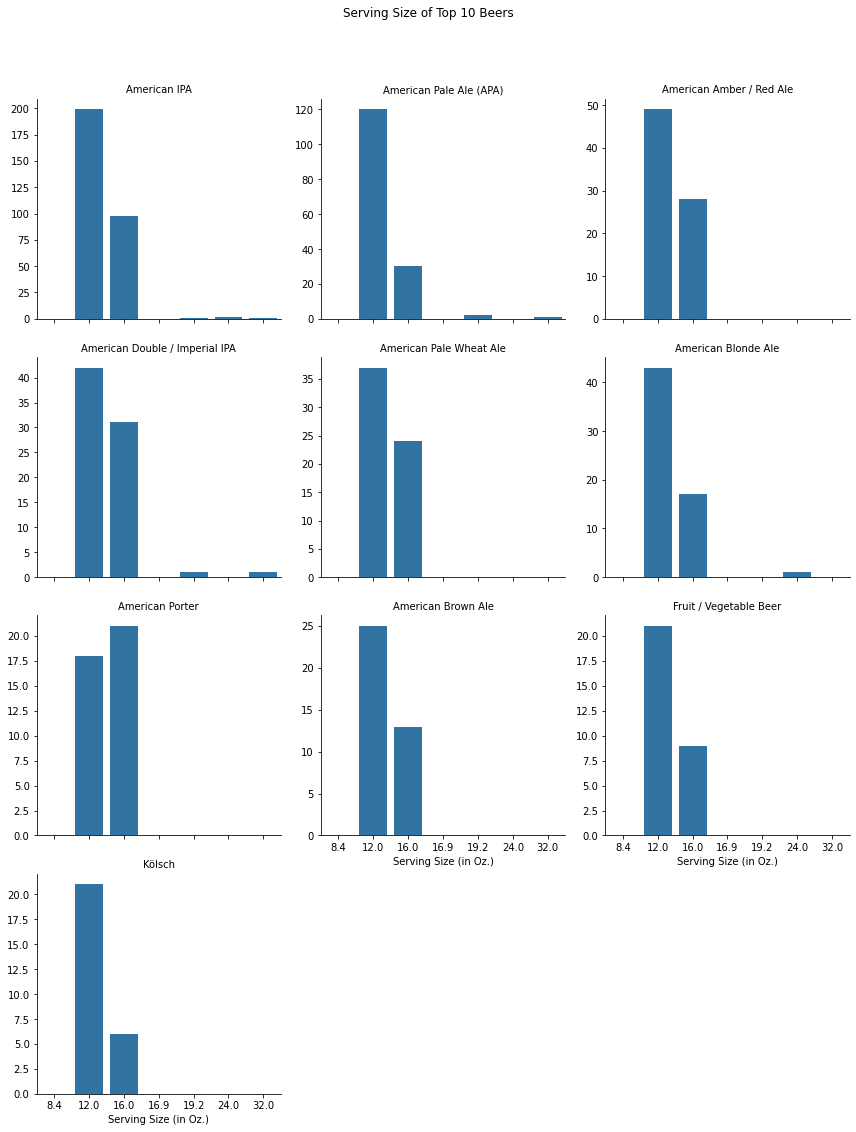

In [34]:
g = sns.FacetGrid(data=df_beer_sub, col='Beer Style', col_wrap=3,height=4, col_order=top_10_beer, sharey =False)
g.map(sns.countplot, "Serving Size (in Oz.)", order =serving_order)
g.set_titles('{col_name}')
g.fig.suptitle('Serving Size of Top 10 Beers')
g.fig.subplots_adjust(top=.9);

### Top 5 Beers for Top 10 States 

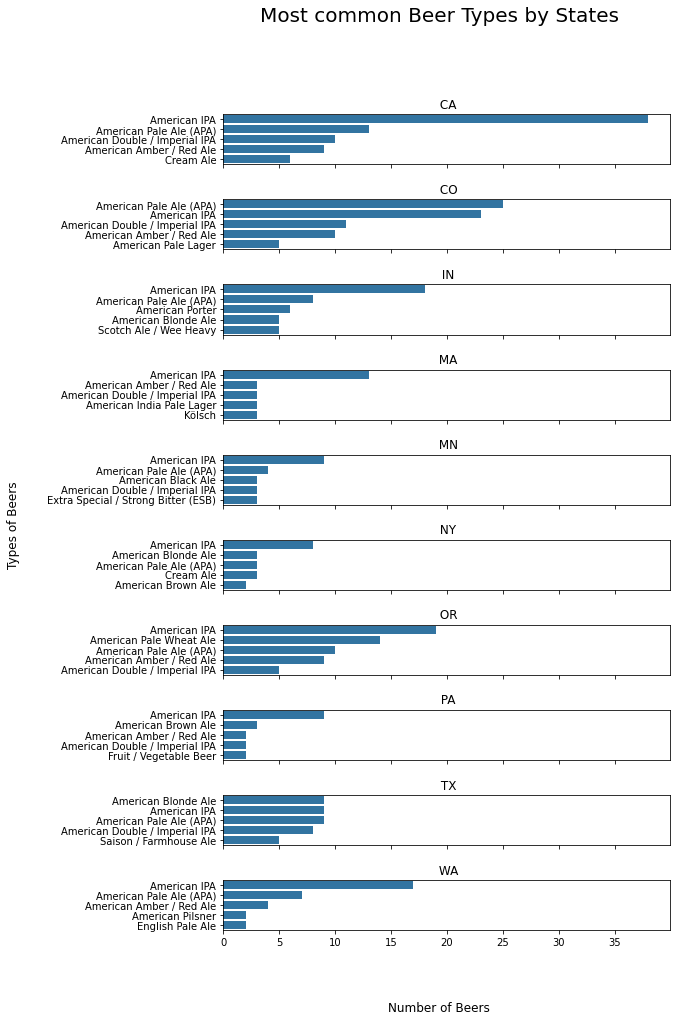

In [35]:
# Top beers in each state
# First we group by the Brewery State and the Beer Style
df_gb = df_state_sub.groupby(['Brewery State','Beer Style'])['Brewery City'].count().reset_index()
# We would like to get the top 5 beer styles in each of these states 
df_gb = df_gb.groupby('Brewery State').apply(lambda grp: grp.nlargest(5, 'Brewery City'))
#Removing the Multi Indexing
df_gb.reset_index(drop=True, inplace=True)

#Plotting
#Creating a figure subplot object
fig, axs = plt.subplots(10,1, figsize=(8,15), sharex=True)
#Flattening the axis
axs = axs.ravel()
#Adjusting the subplot placement
fig.subplots_adjust(wspace=0.5, hspace=0.7)
#Title for the whole plot
fig.suptitle("Most common Beer Types by States", fontsize=20)
#X axis title
fig.text(0.5, 0.05, 'Number of Beers', ha='center', fontsize=12)
#Y axis title
fig.text(-0.25, 0.5, 'Types of Beers', va='center', rotation='vertical', fontsize=12)
#Iterating over each of the subplots
for i in range(10):
    g= sns.barplot(data=df_gb.iloc[i*5: (i*5)+5], y="Beer Style", x="Brewery City", ax=axs[i], color=color)
    #Naming each of the subplots with the corresponding state name
    axs[i].title.set_text(df_gb.iloc[i*5: (i*5)+5]['Brewery State'].unique()[0])
    #Removing the individual x label and y label
    g.set(xlabel="", ylabel="")
    

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It looks like IBU and ABV are highly correlated to one another. If one increases, the other tends to increase. In other words, a bitter beer should be able to get you drunk quicker. I would want to test out this hypothesis when I consider beer style to be a third variable for my analysis.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interestingly, the serving sizes across the different states various quite a lot.  States like Indiana like their beer big whereas states like Philidelphia prefer to have smaller sized beers. The serving size also differs for different beer styles. For example, American Porter is preferred more in 16 Oz. than in 12 Oz. serving.

## Multivariate Analysis 

### ABV vs. IBU for Top 10 Beers 

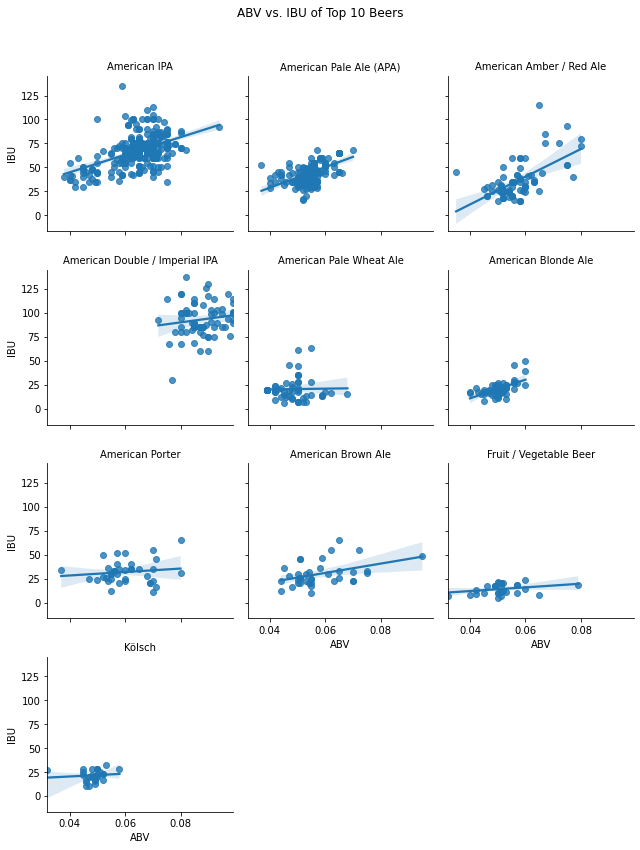

In [36]:
g = sns.FacetGrid(data=df_beer_sub, col='Beer Style', col_wrap=3,height=3, col_order=top_10_beer)
g.map(sns.regplot, "ABV", "IBU")
g.set_titles('{col_name}')
g.fig.suptitle('ABV vs. IBU of Top 10 Beers')
g.fig.subplots_adjust(top=0.9);

### ABV vs. IBU for Top 3 Beers

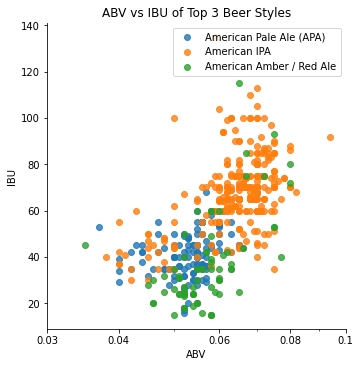

In [37]:
#Creating a dataframe of top 3 beer styles
df_beer_sub_sub = df_beer_sub[df_beer_sub['Beer Style'].isin(top_10_beer[:3])]
#Creating a FacetGrid with beer style as a hue
g = sns.FacetGrid(data=df_beer_sub_sub, hue='Beer Style', height=5)
#Mapping a regression plot (scatter plot) of ABV vs IBU
g.map(sns.regplot, "ABV", "IBU", fit_reg=False)
g.set_titles('{col_name}')
#Changing the xticks for better visualization
xticks = [0.03, 0.04, 0.06, 0.08, 0.1]
plt.xscale('log')
plt.xticks(xticks, labels=xticks)
#Adding the legend
plt.legend()
#Adding Plot Title
plt.title("ABV vs IBU of Top 3 Beer Styles");

### ABV vs. IBU for Top 10 Beer States

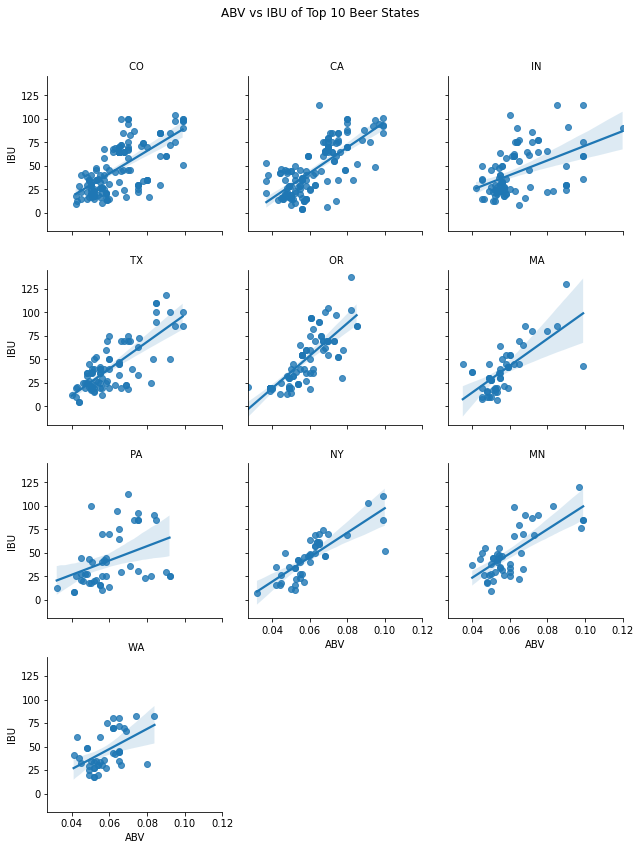

In [38]:
g = sns.FacetGrid(data=df_state_sub, col='Brewery State', col_wrap=3,height=3, col_order=top_10_state, sharex=True)
g.map(sns.regplot, "ABV", "IBU")
g.set_titles('{col_name}')
g.fig.suptitle('ABV vs IBU of Top 10 Beer States')
g.fig.subplots_adjust(top=0.9);

### ABV vs. IBU for Differing Serving Size

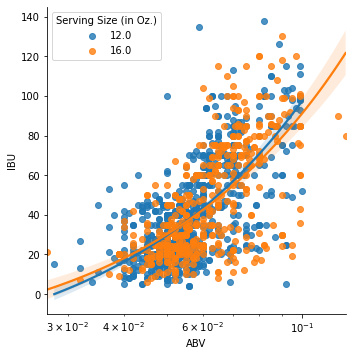

In [39]:
df_serv = df_copy[df_copy['Serving Size (in Oz.)'].isin([12.0,16.0])]
g = sns.FacetGrid(data=df_serv, hue='Serving Size (in Oz.)', height=5)
g.map(sns.regplot, "ABV", "IBU")
g.set(xscale='log')
plt.legend(title='Serving Size (in Oz.)')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It seems like the ABV and IBU correlation changes massively depending upon which beer style we are talking about. For example, for American Porter the IBU remain more or less the same but the ABV can keep increasing. So with American Porter, you never know what kind of Alcohol content it has. On the flipside, American Red/Amber Ale shows that IBU and ABV have a huge correlation. So the bitter it gets, the more alcohol it has.


We did not see much of an impact of the serving size on the ABV vs. IBU but one thing to note is that the highest alcohol content (probably the outliers) are for 16 Oz. servings.

### Were there any interesting or surprising interactions between features?

When we look at IBU vs ABV for states, it seems some states have a steeper slope in terms of the relation between IBU and ABV whereas some have less steeper slope. This was particularly intersting because the origin of the state never made an impact to my beer purchase before. Guess after this analysis, my beer drinking thought process needs to be revamped.